In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv("abalone_dataset.csv")

In [54]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [55]:
#rename output variable
df.rename(columns={"Sex":"sex", "Length":"length", "Diameter":"diameter",
                   "Height":"height", "Whole weight":"whole_weight",
                   "Shucked weight":"shucked_weight", "Viscera weight":"viscera_weight",
                   "Shell weight":"shell_weight", "Rings":"rings"}, inplace = True)

In [56]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [57]:
df.shape

(4177, 9)

In [58]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [59]:
df[df['height'] == 0]
df.drop(index=[1257,3996], inplace = True)

In [60]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [61]:
df['age'] = df['rings']+1.5 #AS per the problem statement
df.drop('rings', axis = 1, inplace = True)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Feature Engineering

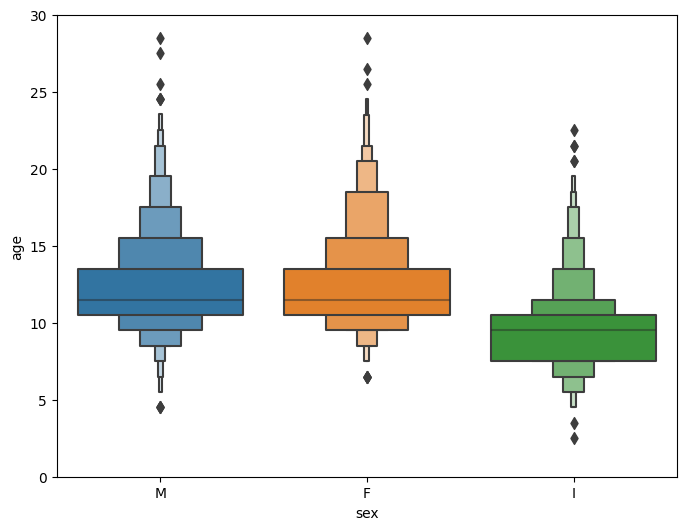

In [62]:
#Age vs sex
#categorical features
temp = pd.concat([df['age'], df['sex']], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='sex', y="age", data=df)
fig.axis(ymin=0, ymax=30);

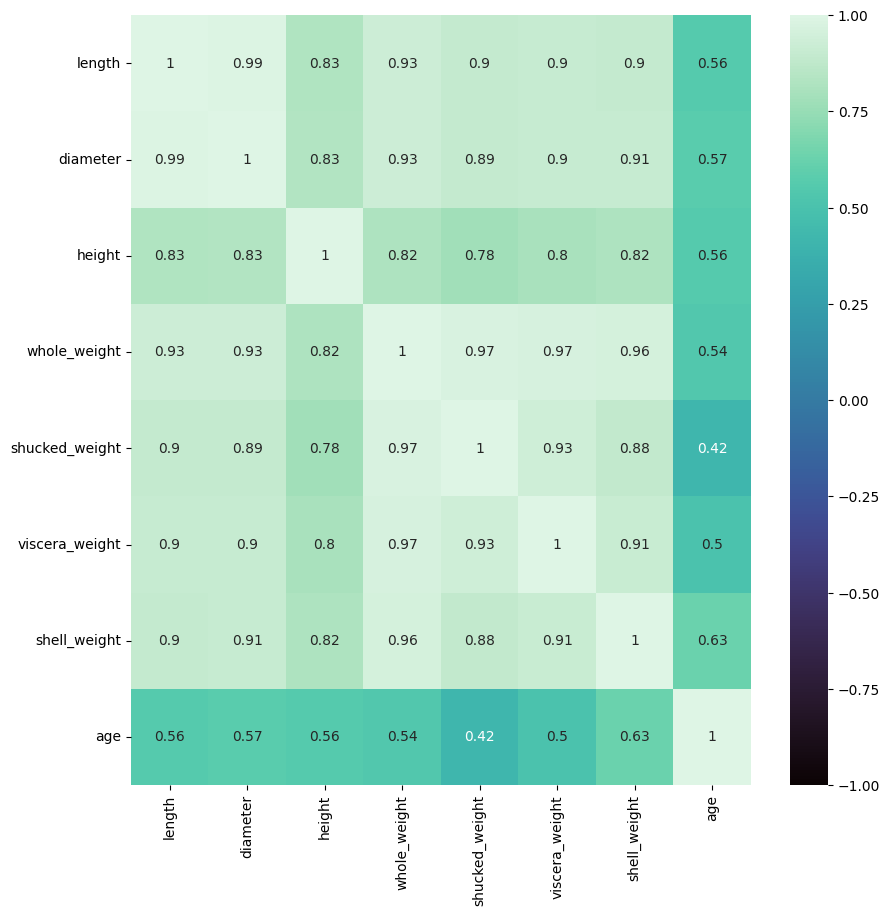

In [63]:
corr = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

In [64]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.96)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['diameter', 'shucked_weight', 'viscera_weight']


In [65]:
df.drop(columns_to_drop, axis=1, inplace = True)

In [66]:
df.head()

,sex,length,height,whole_weight,shell_weight,age
0,M,0.455,0.095,0.5140,0.150,16.5
1,M,0.350,0.090,0.2255,0.070,8.5
2,F,0.530,0.135,0.6770,0.210,10.5
3,M,0.440,0.125,0.5160,0.155,11.5
4,I,0.330,0.080,0.2050,0.055,8.5


In [67]:
#calculating VIF
def vif_arr(df1):
    vif = pd.DataFrame()
    df1 = sma.add_constant(df1)
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return(vif)

In [68]:
temp = df.drop('sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)


,Features,VIF
3,whole_weight,17.363690
4,shell_weight,14.795429
1,length,7.835921
2,height,3.577489
0,const,65.118788
5,age,1.837773


Text(0.5, 1.0, 'height vs sex')

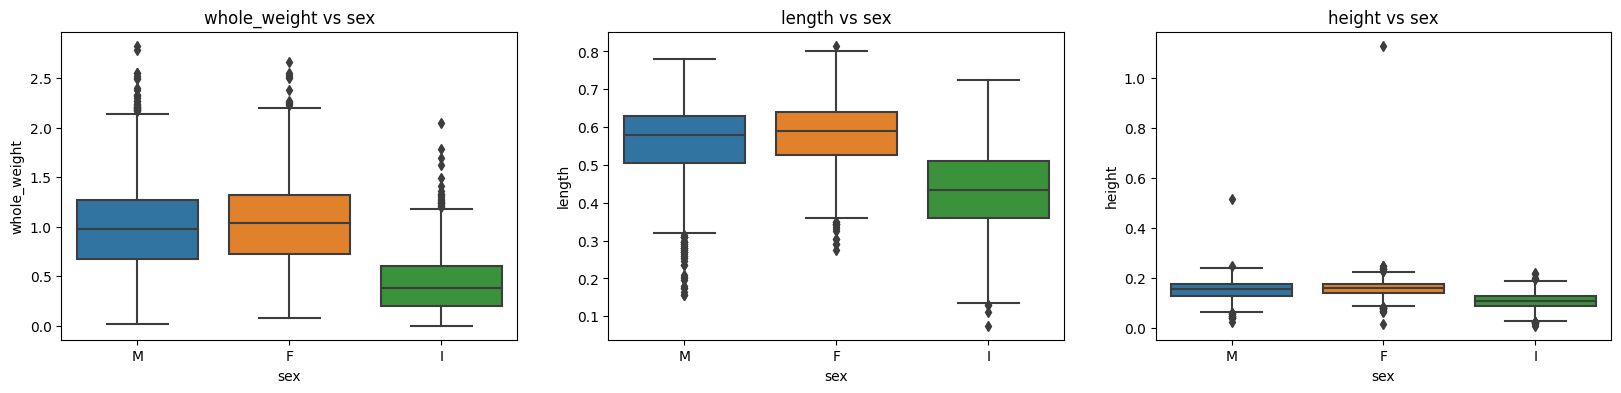

In [69]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'sex', y = 'whole_weight', data = df, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'sex', y = 'length', data = df, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'sex', y = 'height', data = df, ax = axes[2])
axes[2].set_title('height vs sex')

In [70]:
df['height'] = np.sqrt(df['height'])

In [71]:
df.skew().sort_values(ascending = False)

age             1.113754
shell_weight    0.621081
whole_weight    0.530549
height         -0.176012
length         -0.640993
dtype: float64

Text(0.5, 1.0, 'height vs sex')

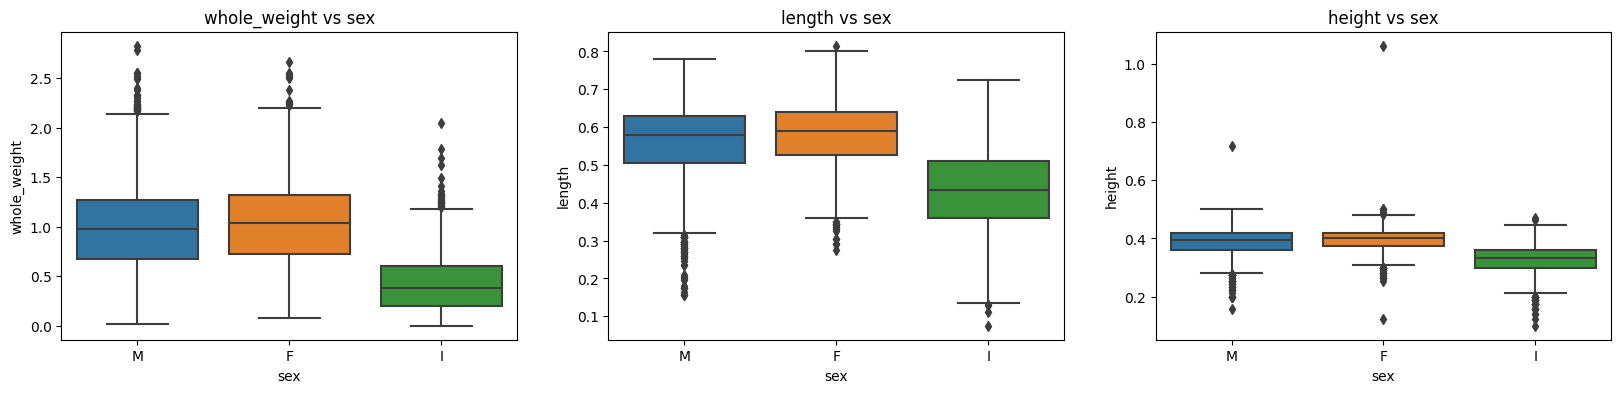

In [72]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'sex', y = 'whole_weight', data = df, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'sex', y = 'length', data = df, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'sex', y = 'height', data = df, ax = axes[2])
axes[2].set_title('height vs sex')

All independent varibles values are close to zero. So, they are now close to gaussian distribution.

- Histograms: Distribution of the Numerical Features

array([[<AxesSubplot: title={'center': 'length'}>,
        <AxesSubplot: title={'center': 'height'}>,
        <AxesSubplot: title={'center': 'whole_weight'}>,
        <AxesSubplot: title={'center': 'shell_weight'}>],
       [<AxesSubplot: title={'center': 'age'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

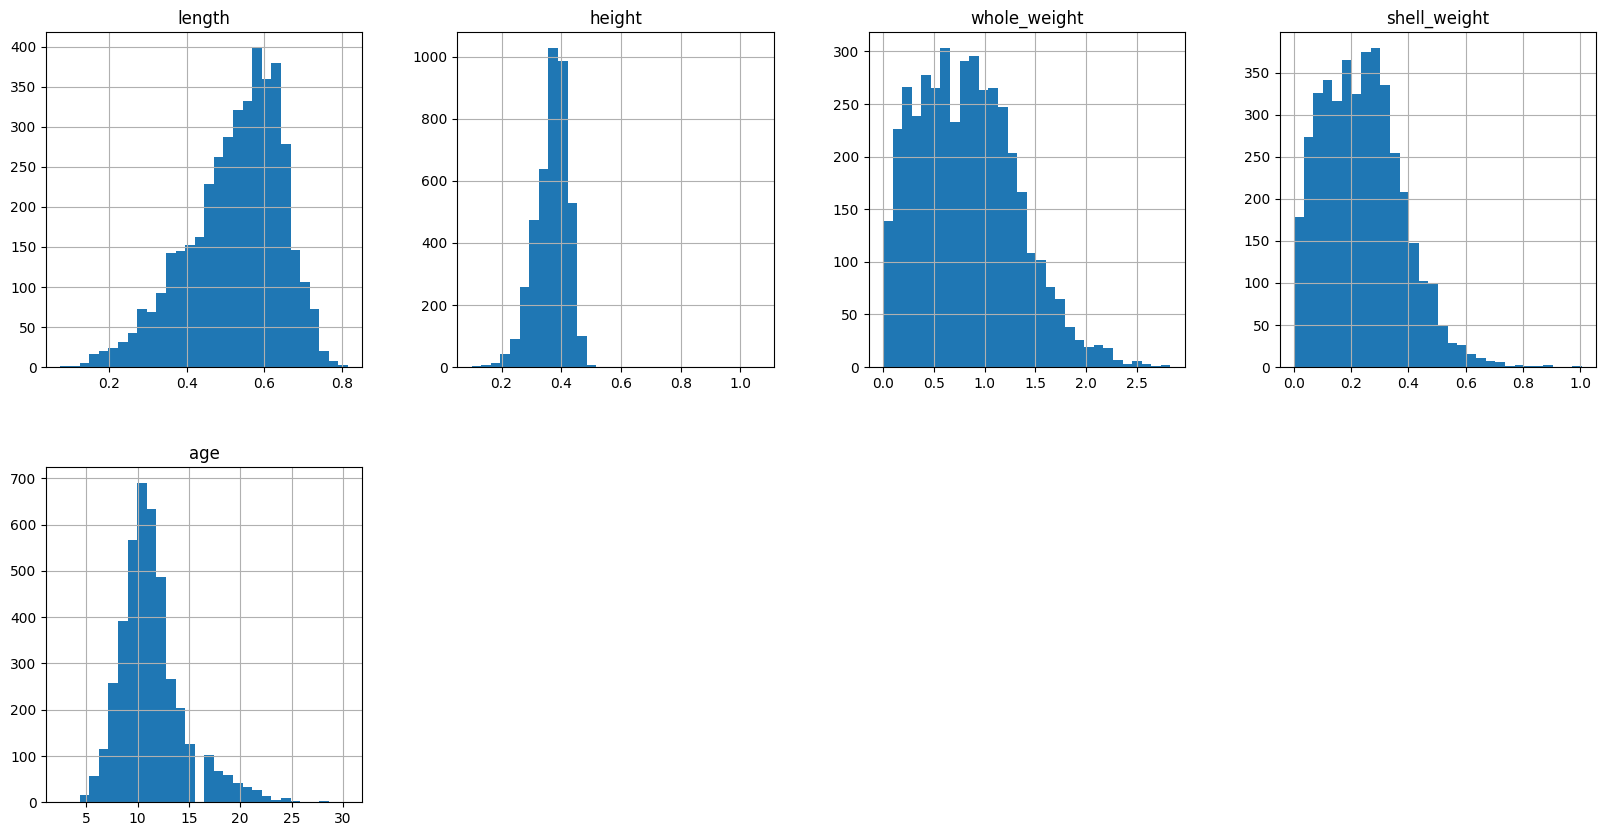

In [33]:
df.hist(figsize = (20,10), layout = (2,4), bins = 30)

In [100]:
Age = []
for i in df["whole_weight"]:
    if i <= 0.5:
        Age.append(1)
    elif i > 0.5 and i <= 0.8 :
        Age.append(2)
    else:
        Age.append(3)
df["age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
df.head()

,sex,length,height,whole_weight,shell_weight,age
0,M,0.455,0.308221,0.5140,0.150,2
1,M,0.350,0.300000,0.2255,0.070,1
2,F,0.530,0.367423,0.6770,0.210,2
3,M,0.440,0.353553,0.5160,0.155,2
4,I,0.330,0.282843,0.2050,0.055,1


In [91]:
sns.countplot('age', data=df)
plt.title('Distributed Classes')
plt.show()

TypeError: countplot() got multiple values for argument 'data'

In [92]:
new_df = pd.get_dummies(df)
new_df['age'].value_counts()

1    1535
3    1471
2    1169
Name: age, dtype: int64

In [93]:
#NEW VIF
vif_arr(new_df).sort_values(by = 'Features', ascending = False)

,Features,VIF
3,whole_weight,18.369866
4,shell_weight,12.378658
8,sex_M,inf
7,sex_I,inf
6,sex_F,inf
1,length,9.681749
2,height,5.207462
0,const,0.000000
5,age,5.341390


In [94]:
new_df['length'] = np.sqrt(new_df['length'])
vif_arr(new_df).sort_values(by = 'Features', ascending = False)

,Features,VIF
3,whole_weight,17.213335
4,shell_weight,12.383198
8,sex_M,inf
7,sex_I,inf
6,sex_F,inf
1,length,7.499077
2,height,5.547763
0,const,0.000000
5,age,5.278431


## Model Training

In [95]:
X = new_df.drop('age', axis = 1)
y = new_df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Use if you want to normalize data
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)
#X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
#X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

#X_train = X_train_std.values
#X_test = X_test_std.values

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [96]:
classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier(),
               "RandomForestClassifier" : RandomForestClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 98.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.0 % accuracy score
Classifiers:  SVC Has a training score of 99.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score


In [97]:
y_train

array([1, 3, 2, ..., 2, 2, 3], dtype=int64)

In [79]:
print(X_train)
print(X_train[0])

[[0.475      0.34641016 0.441      ... 0.         1.         0.        ]
 [0.7        0.41833001 1.8565     ... 0.         0.         1.        ]
 [0.5        0.36055513 0.7715     ... 0.         0.         1.        ]
 ...
 [0.52       0.38729833 0.728      ... 1.         0.         0.        ]
 [0.575      0.38729833 0.927      ... 1.         0.         0.        ]
 [0.595      0.4        1.1405     ... 1.         0.         0.        ]]
[0.475      0.34641016 0.441      0.1505     0.         1.
 0.        ]


In [80]:
y_train.shape

(3340,)

In [81]:
y_test.shape

(835,)

In [82]:
X_train.shape

(3340, 7)

In [83]:
X_test.shape

(835, 7)

In [98]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       305
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       292

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835

[[305   0   0]
 [  1 237   0]
 [  0   0 292]]


In [99]:
new_df

,length,height,whole_weight,shell_weight,age,sex_F,sex_I,sex_M
0,0.674537,0.308221,0.5140,0.1500,1,0,0,1
1,0.591608,0.300000,0.2255,0.0700,1,0,0,1
2,0.728011,0.367423,0.6770,0.2100,2,1,0,0
3,0.663325,0.353553,0.5160,0.1550,1,0,0,1
4,0.574456,0.282843,0.2050,0.0550,1,0,1,0
...,...,...,...,...,...,...,...,...
4172,0.751665,0.406202,0.8870,0.2490,2,1,0,0
4173,0.768115,0.367423,0.9660,0.2605,2,0,0,1
4174,0.774597,0.452769,1.1760,0.3080,3,0,0,1
4175,0.790569,0.387298,1.0945,0.2960,3,1,0,0


In [86]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, y_train)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [87]:
import pickle
pickle.dump(model, open('randomForest.pkl', 'wb'))

In [2]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.4 MB/s eta 0:00:00


In [6]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.1 MB/s eta 0:00:00


In [8]:
!pip install statsmodels

     ---------------------------------------- 9.0/9.0 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 1.8 MB/s eta 0:00:00


In [3]:
pip install --upgrade --force-reinstall --no-cache-dir jupyter

     -------------------------------------- 439.1/439.1 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 121.0/121.0 kB 7.4 MB/s eta 0:00:00
     -------------------------------------- 274.8/274.8 kB 4.3 MB/s eta 0:00:00
     -------------------------------------- 149.2/149.2 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 137.8/137.8 kB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 4.9/4.9 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 775.8/775.8 kB 4.1 MB/s eta 0:00:00
     -------------------------------------- 133.5/133.5 kB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 42.7/42.7 kB ? eta 0:00:00
     -------------------------------------- 252.5/252.5 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 966.9/966.9 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 425.3/425.3 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 116.8

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~ywin32_system32\\pythoncom311.dll'
Consider using the `--user` option or check the permissions.



In [7]:
pip3 install --upgrade --force-reinstall --no-cache-dir jupyter

SyntaxError: invalid syntax (442946174.py, line 1)

In [8]:
import os

In [9]:
os.getcwd()

'C:\\Users\\Administrator\\Downloads\\abalone-age-app'

In [15]:
os.chdir('C:\\Users\\Administrator\\Downloads\\abalone-age-app')

In [16]:
data

NameError: name 'data' is not defined

In [19]:
df

NameError: name 'df' is not defined

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install numpy==1.23.1


  Using cached numpy-1.23.1.tar.gz (10.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build numpy


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [213 lines of output]
  setup.py:71: RuntimeWarning: NumPy 1.23.1 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  setup.py:86: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    import numpy.distutils.command.sdist
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing

In [ ]:
pip uninstall numpy

In [ ]:
pip install numpy==1.23.1